This notebook is used to analyze the audit data when the provider uses a heuristic policy.

In [1]:
%matplotlib inline

import pickle
from transformers import AutoTokenizer, AutoModelForCausalLM
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerTuple

import os
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import numpy as np
from IPython.display import clear_output
os.chdir("../")
import pandas as pd
import matplotlib.ticker as mticker
from matplotlib.ticker import FuncFormatter

from src import utils
from matplotlib.lines import Line2D


palette = sns.color_palette("Set2")
#Create color dic for all 3 models
color_dic = {"L1B": palette[0], "M8B": palette[1], "G1B": palette[2]}

# Load the faitful generation data

In [ ]:
model = "L1B"


if model == "G1B":
    idx_list = [1, 401, 801, 1201, 1601, 2401, 2801, 3201, 3601, 3901]
else:
    idx_list = [1, 401, 801, 1201, 1601, 2401, 2801, 3201, 3601]
    


unbiased_1 = []
original_1 = []

for idx in idx_list:

    with open(f"outputs/audit_faithfull/audit_faithful_{model}_temp_1.0_poi_7.0_geo_None_id_{idx}.pkl", "rb") as f:
        data_temp = pickle.load(f)
        unbiased_1 += [ d["unbiased_length"] for d in data_temp] 
        original_1 += [ len(d["original"]["tokens"]) for d in data_temp]
        clear_output()



unbiased_115 = []
original_115 = []

for idx in idx_list:

    with open(f"outputs/audit_faithfull/audit_faithful_{model}_temp_1.15_poi_7.0_geo_None_id_{idx}.pkl", "rb") as f:
        data_temp = pickle.load(f)
        unbiased_115 += [ d["unbiased_length"] for d in data_temp] 
        original_115 += [ len(d["original"]["tokens"]) for d in data_temp]

        
unbiased_13 = []
original_13 = []

for idx in idx_list:

    with open(f"outputs/audit_faithfull/audit_faithful_{model}_temp_1.3_poi_7.0_geo_None_id_{idx}.pkl", "rb") as f:
        data_temp = pickle.load(f)
        unbiased_13 += [ d["unbiased_length"] for d in data_temp] 
        original_13 += [ len(d["original"]["tokens"]) for d in data_temp]

    

# Load the heuristic data

In [ ]:


iter_list = [1, 2 ,3 ,4 ,5 ,6, 7,8,9,10,11,12,13,14,15,16,17,18,19,20]

#Aggregate all data into a single object

data_1 = [[] for _ in iter_list ]

data_115 = [[] for _ in iter_list ]

data_13 = [[] for _ in iter_list ]


for iter_ind in range(len(iter_list)):
    iter=iter_list[iter_ind]

    with open(f"outputs/audit_heuristic/audit_heuristic_{model}_temp_1.0_iter_{iter}_p_0.999_id_1.pkl", "rb") as f:
        data_temp = pickle.load(f)
        data_1[iter_ind] = data_temp
        clear_output()
        
    with open(f"outputs/audit_heuristic/audit_heuristic_{model}_temp_1.15_iter_{iter}_p_0.999_id_1.pkl", "rb") as f:
        data_temp = pickle.load(f)
        data_115[iter_ind] = data_temp
        clear_output()
        
    with open(f"outputs/audit_heuristic/audit_heuristic_{model}_temp_1.3_iter_{iter}_p_0.999_id_1.pkl", "rb") as f:
        data_temp = pickle.load(f)
        data_13[iter_ind] = data_temp
        clear_output()



difs_1 = [[] for _ in iter_list ]

difs_115 = [[] for _ in iter_list ]

difs_13 = [[] for _ in iter_list ]

for iter_ind in range(len(iter_list)):

    difs_1[iter_ind] = [ len(data_1[iter_ind][i]["misreported_tokens"]) - unbiased_1[i] for i in range(len(unbiased_1)) ]
    
    
    difs_115[iter_ind] = [ len(data_115[iter_ind][i]["misreported_tokens"]) - unbiased_115[i] for i in range(len(unbiased_115)) ]
    

    difs_13[iter_ind] = [ len(data_13[iter_ind][i]["misreported_tokens"]) - unbiased_13[i] for i in range(len(unbiased_13)) ]


#Compute the average number of additional tokens per iteration
intens_1 = []
intens_115 = [ ]
intens_13 = [ ]

for iter_ind in range(len(iter_list)):

    intens_1.append(np.mean(  [ len(data_1[iter_ind][i]["misreported_tokens"]) -  original_1[i] for i in range(len(unbiased_1))   ] ))
    intens_115.append(np.mean(  [ len(data_115[iter_ind][i]["misreported_tokens"]) -  original_115[i] for i in range(len(unbiased_115))   ] ))
    intens_13.append(np.mean(  [ len(data_13[iter_ind][i]["misreported_tokens"]) -  original_13[i] for i in range(len(unbiased_13))   ] ))
    
#print all intensities for all number of iterations:
for iter_ind in range(len(iter_list)):
    print(f"Intensity for m={iter_list[iter_ind]} iterations: {intens_1[iter_ind]}, {intens_115[iter_ind]}, {intens_13[iter_ind]}")


Model:  G1B
Lambda_1:  0.19
0.19 -0.69
iter_index:  1
Stopping times:  [55 60 55 53 55 62 52 64 60 57 56 52 51 48 56 59 52 58 58 60 48 53 51 55
 66 58 55 59 66 60 61 57 65 63 62 74 58 56 46 57 52 50 67 66 52 55 54 59
 57 63 55 56 62 59 57 66 69 52 56 55]
Mean stopping time:  57.779661016949156
iter_index:  6
Stopping times:  [36 21 33 27 19 17 27 19 16 28 18 27 22 33 20 20 28 25 22 27 20 21 28 20
 20 25 20 19 27 21 23 17 16 16 24 26 26 18 29 21 23 31 19 23 21 20 16 27
 23 14 18 14 14 22 25 28 27 22 22 28 29 23 21 22 33 27 16 25 18 22 32 25
 29 19 18 30 22 16 27 26 19 22 22 24 27 35 29 28 25 15 20 29 23 22 27 29
 24 32 26 28 16 21 18 34 26 18 32 27 20 25 16 22 18 25 18 30 25 22 14 25
 21 31 22 16 28 28 32 19 33 19 18 36 22 21 21 12 28 29 22 18 24 17 24 38
 25 28 21 25 19]
Mean stopping time:  23.527027027027028
iter_index:  19
Stopping times:  [22 16  8  7 27 24 18 17 14 34 19 29  8  5 25 14 13 24 19 16 15 26 15 13
 18 12 18 18 16 11 21 20 19  6 14 14  9 10 15 10 17  8 13  8 11 11 22 16

<Figure size 640x480 with 0 Axes>

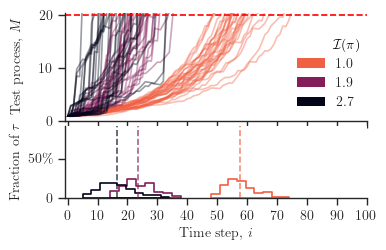

In [ ]:
plt.clf()
sns.set_theme(context='paper', style='ticks', font_scale=1)
width_pt = 469
palette = sns.color_palette('husl', 4)
cmap = sns.color_palette("rocket_r", as_cmap=True)



utils.latexify()

fig_width, fig_height = utils.get_fig_dim(width_pt, fraction=0.6)

# ---- create two axes (y-axis broken) ----
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True,
                               figsize=(fig_width, fig_height),
                               gridspec_kw={'height_ratios': [6, 4]})
fig.subplots_adjust(hspace=0.05)  # space between






temp = 1.0



#Define the iterations to plot for each model

inter_dic ={"L1B":[0,1,3], "M8B":[0,1,3], "G1B":[1, 6 ,19] }

#Define the intensity dict for each model and temperature, to use in the legend

if temp== 1.0:
    intensity_dict = {"L1B": [0.8, 1.6, 3.0], "M8B" : [0.8, 1.6, 2.9], "G1B" : [1.0, 1.9, 2.7] }
if temp== 1.15:
    intensity_dict = {"L1B": [0.9, 1.9, 3.7], "M8B" : [0.9, 1.8, 3.5], "G1B" : [1.4, 3.2, 5.5] }
if temp== 1.3:
    intensity_dict = {"L1B": [0.9, 1.9, 3.8], "M8B" : [1.0, 1.9, 3.7], "G1B" : [1.6, 3.8, 8.0] }


iter_index_list= inter_dic[model]

num_process = 30
proc_length = 100

#Define the lambda for each model and temperature, obtained from the audit_faithful.ipynb experiments

lambda_1_dic = {"L1B": 0.066, "M8B" : 0.13 , "G1B" : 0.19 }

lambda_115_dic = {"L1B": 0.066, "M8B" : 0.10 , "G1B" : 0.16 }


lambda_13_dic = {"L1B": 0.066, "M8B" : 0.10 , "G1B" : 0.19 }



lambda_1 = lambda_1_dic[model]

lambda_115 = lambda_115_dic[model]

lambda_13 = lambda_13_dic[model]


if temp == 1.0:
    difs = difs_1
    lamb = lambda_1 
    
elif temp == 1.15:
    difs = difs_115
    lamb = lambda_115 
elif temp == 1.3:
    difs = difs_13
    lamb = lambda_13 


 


for j in range(len(iter_index_list)):
    iter_index = iter_index_list[j]
    print("iter_index: ", iter_index)
    for process in range(num_process):
        grow = False
        M = [1]
        
        for i in range(proc_length):
            
            M.append(M[i] * (1 + lamb * ( difs[iter_index][process * proc_length + i] )))
        

        first_hitting_time = next((index for index, value in enumerate(M) if value >= 20), None)
        
        if first_hitting_time is not None:
            ax1.plot(M[:first_hitting_time + 1], color=cmap((j+1)/len(iter_index_list)), alpha=0.4)



    stopping_times = []

    total_data = len(difs[iter_index])
    M = 1

    total_index = 0 
    local_index = 0

    while total_index < total_data:
        total_index += 1
                
        
        M = M * (1 + lamb * ( difs[iter_index][total_index-1] ))
   
        local_index += 1
        if M >= 20:
            stopping_times.append(local_index)
            M = 1
            local_index = 0
            

    stopping_times = np.asarray(stopping_times)
    print("Stopping times: ", stopping_times)
 

    sns.histplot(stopping_times, stat="percent",discrete=False,
                binwidth=3,
                ax=ax2, color=cmap((j+1)/len(iter_index_list)),
                element="step",
                fill=True,       # fill polygons (so edges close)
                alpha=0,         # but make fill invisible
                linewidth=1.2    # stronger edges
                )
    #Plot mean of histogram
    ax2.axvline(np.mean(stopping_times), color=cmap((j+1)/len(iter_index_list)), linestyle='--', alpha=0.7)




# Add horizontal line at y=20 (only in top plot)
ax1.axhline(y=20, color="red", linestyle='--', alpha=1)

# Axis limits
ax1.set_ylim(0, 20.3)    # narrow region around y=20
ax2.set_xlim(-1, 100)

# Labels
ax2.set_xlabel(r'Time step, $i$')


# Hide spines and add diagonal cut marks
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax1.tick_params(top=False)  
  
ax2.xaxis.tick_bottom()

ax1.set_ylabel(r"Test process, $M$", labelpad=11.5)

sns.despine(ax=ax1, bottom=False)
sns.despine(ax=ax2, top=True)

ax1.xaxis.tick_bottom()



ax2.set_xticks([0, 10, 20, 30, 40, 50, 60,70,80,90,100])
ax2.set_yticks([0, 50])
ax2.set_yticklabels([0, r"50\%"])
ax2.set_ylim(0, 91)
ax2.set_ylabel(r"Fraction of $\tau$")






# Create legend handles
legend_handles = []



# Next three rows: small color boxes
for j in range(3):
    color = cmap((j+1)/len(iter_index_list))
    legend_handles.append(Patch(facecolor=color, edgecolor='none', label=intensity_dict[model][j]))

# Add legend to ax1
ax1.legend(handles=legend_handles, loc='lower right', frameon=False, ncol=1, fontsize=10)
ax1.text(0.93, 0.7, r"$\mathcal{I}(\pi)$", fontsize=10, color='black', ha='center', va='center',transform=ax1.transAxes)


    

plt.show()
